### Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

### Step 2: Data Preparation

In [2]:
df = pd.read_csv("AAPL.csv")

In [3]:
df_sorted = df.sort_values(by='Date')
df_sorted.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,18.556429,18.685356,18.299286,18.303213,16.067413,262620400
1,2013-11-08,18.377857,18.611786,18.306786,18.591429,16.320423,279316800
2,2013-11-11,18.571072,18.631071,18.371786,18.537500,16.273079,227452400
3,2013-11-12,18.488214,18.711430,18.464287,18.571787,16.303186,204276800
4,2013-11-13,18.500000,18.651787,18.462856,18.593929,16.322620,197220800


In [72]:
# Assuming you want to predict the 'passenger_count'

data = df["passenger_count"].values

### Step 3: Data Preprocessing

In [73]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

sequence_length = 100  # Adjust this as needed
sequences = []
targets = []

for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    targets.append(data[i+sequence_length])

sequences = np.array(sequences)
targets = np.array(targets)

In [ ]:
sequences[0], targets[0]

In [74]:
len(sequences)

16000

In [75]:
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

### Step 4: Build and Train RNN Model

In [50]:
model_rnn = keras.Sequential(name="RNN")
model_rnn.add(keras.layers.SimpleRNN(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_rnn.add(keras.layers.Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

In [51]:
model_rnn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
400/400 [==============================] - 6s 13ms/step - loss: 0.0700
Epoch 2/100
400/400 [==============================] - 5s 13ms/step - loss: 0.0696
Epoch 3/100
400/400 [==============================] - 5s 13ms/step - loss: 0.0695
Epoch 4/100
400/400 [==============================] - 5s 13ms/step - loss: 0.0693
Epoch 5/100
400/400 [==============================] - 5s 13ms/step - loss: 0.0693
Epoch 6/100
400/400 [==============================] - 5s 13ms/step - loss: 0.0693
Epoch 7/100
400/400 [==============================] - 5s 13ms/step - loss: 0.0691
Epoch 8/100
400/400 [==============================] - 5s 13ms/step - loss: 0.0692
Epoch 9/100
400/400 [==============================] - 5s 13ms/step - loss: 0.0690
Epoch 10/100
400/400 [==============================] - 5s 13ms/step - loss: 0.0691
Epoch 11/100
400/400 [==============================] - 5s 13ms/step - loss: 0.0691
Epoch 12/100
400/400 [==============================] - 5s 13ms/step - loss: 0.0690
E

### Step 5: Build and Train LSTM Model

In [76]:
model_lstm = keras.Sequential(name="LSTM")
model_lstm.add(keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_lstm.add(keras.layers.Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [77]:
model_lstm.fit(X_train, y_train, epochs=5, batch_size=512, verbose=1)

Epoch 1/100
400/400 [==============================] - 36s 78ms/step - loss: 0.0697
Epoch 2/100
400/400 [==============================] - 31s 77ms/step - loss: 0.0694
Epoch 3/100
400/400 [==============================] - 32s 79ms/step - loss: 0.0693
Epoch 4/100
400/400 [==============================] - 31s 78ms/step - loss: 0.0693
Epoch 5/100
400/400 [==============================] - 31s 78ms/step - loss: 0.0692
Epoch 6/100
 13/400 [..............................] - ETA: 30s - loss: 0.0612

KeyboardInterrupt: 

### Step 6: Build and Train GRU Model

In [82]:
model_gru = keras.Sequential(name="GRU")
model_gru.add(keras.layers.GRU(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_gru.add(keras.layers.Dense(1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

In [83]:
model_gru.fit(X_train, y_train, epochs=5, batch_size=512, verbose=1)

Epoch 1/5
25/25 [==============================] - 17s 578ms/step - loss: 0.0728
Epoch 2/5
25/25 [==============================] - 15s 592ms/step - loss: 0.0695
Epoch 3/5
25/25 [==============================] - 14s 567ms/step - loss: 0.0692
Epoch 4/5
25/25 [==============================] - 14s 550ms/step - loss: 0.0692
Epoch 5/5
25/25 [==============================] - 14s 549ms/step - loss: 0.0692


### Step 7: Evaluate the models

In [84]:
def evaluate_model(model, X_test, y_test):
    X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    y_pred = model.predict(X_test_reshaped)
    y_pred = scaler.inverse_transform(y_pred).flatten()
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    mse = mean_squared_error(y_test, y_pred)
    return mse

mse_rnn = evaluate_model(model_rnn, X_test, y_test)
mse_lstm = evaluate_model(model_lstm, X_test, y_test)
mse_gru = evaluate_model(model_gru, X_test, y_test)

print(f"RNN Mean Squared Error: {mse_rnn}")
print(f"LSTM Mean Squared Error: {mse_lstm}")
print(f"GRU Mean Squared Error: {mse_gru}")

100/100 [==============================] - 6s 53ms/step
RNN Mean Squared Error: 1.8369272874718927
LSTM Mean Squared Error: 1.7772124480442435
GRU Mean Squared Error: 1.7759805802568973


### Step 8: Visualization

In [85]:
y_pred_rnn = model_rnn.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = scaler.inverse_transform(y_pred_rnn).flatten()

y_pred_lstm = model_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm).flatten()

y_pred_gru = model_gru.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_gru = scaler.inverse_transform(y_pred_gru).flatten()

100/100 [==============================] - 4s 42ms/step


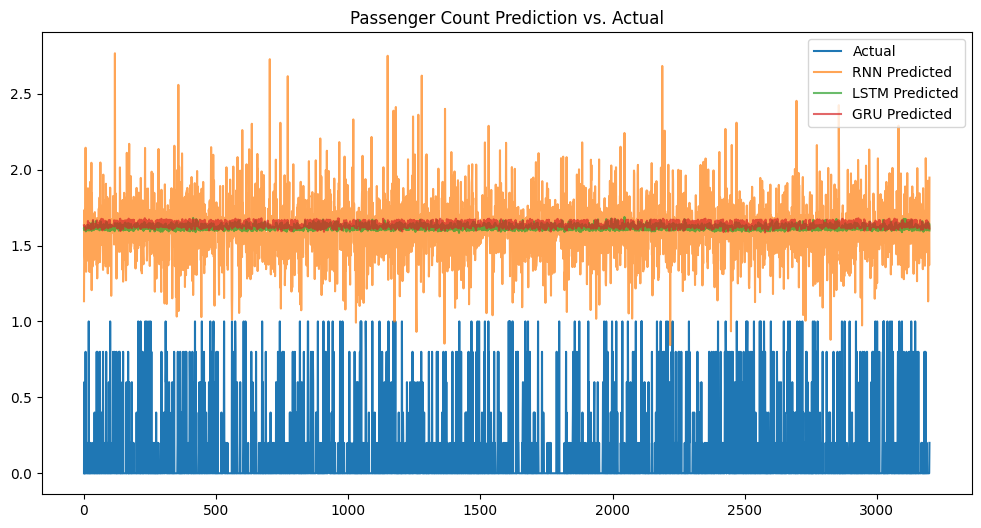

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_rnn, label='RNN Predicted', alpha=0.7)
plt.plot(y_pred_lstm, label='LSTM Predicted', alpha=0.7)
plt.plot(y_pred_gru, label='GRU Predicted', alpha=0.7)
plt.legend()
plt.title('Passenger Count Prediction vs. Actual')
plt.show()

In [87]:
i = 100
y_test[i], y_pred_rnn[i], y_pred_lstm[i], y_pred_gru[i]

(array([0.]), 1.5777588, 1.6058124, 1.6201352)

In [36]:
import numpy as np
np.unique(data)

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [90]:
X_train[0].shape

(100, 1)